<a href="https://colab.research.google.com/github/thiagoemrich00/MUSHROOMS_ANALISE/blob/main/mushrooms_RandomForest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MUSHROOMS RANDON FOREST

## Carregar a base de dados

In [10]:
import numpy as np
import random
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Seed para reprodução de resultados
seed = 1
random.seed(seed)
np.random.seed(seed)

In [11]:
df = pd.read_csv('mushrooms.csv')
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [12]:
# dimensões da base
df.shape

(8124, 23)

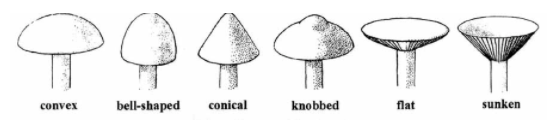

In [13]:
#converter o rótulo categórico em numérico usando o OneHotEncoder

''' Optou-se por utilizar o OneHotEncoder, pois para características categóricas
 não fazia sentido utilizar o LabelEncoder. exemplo: formato do capô do cogumelo: 
cônico, convexo, flat, formato de sino...
'''
'''
OneHotEncoder desdobra uma coluna com n valores em n colunas com valores binários (0,1), 
sendo que drop_first = True elimina a criação da primeira coluna. Exemplo: a coluna 
class é desmembrada em 2 colunas class_e(edible=comestível) e class_p(poisonous=venenoso), 
sendo posteriormente deletada a primeira coluna class_e. Quando o valor de class_p
for 0, significa que é comestível, quando for 1, significa que é venenoso.
'''

dummies = pd.get_dummies(df, drop_first=True)  

## Separar base em treino e teste

In [14]:
from sklearn.model_selection import train_test_split
X = dummies.loc[:,dummies.columns != 'class_p']  # inputs
y = dummies['class_p']                      # outputs
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(6499, 95)
(1625, 95)
(6499,)
(1625,)


## Random Forest

In [15]:
# gerei meu modelo de random forest
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=100,max_depth=4)
model.fit(X_train, y_train);

In [16]:
# avaliar o teste
acc = model.score(X_train, y_train)*100 # acurácia de treino (percentual)
print('A acurácia do modelo na base de treino é de: ', acc, '%')

A acurácia do modelo na base de treino é de:  99.046007078012 %


In [17]:
# avaliar o teste
acc = model.score(X_test, y_test)*100 # acurácia de teste (percentual)
print('A acurácia do modelo na base de teste é de: ', acc, '%')

A acurácia do modelo na base de teste é de:  98.8923076923077 %


Acurácia:  0.9889230769230769
Kappa:  0.9777990299883872
F1:  0.9888981499193834


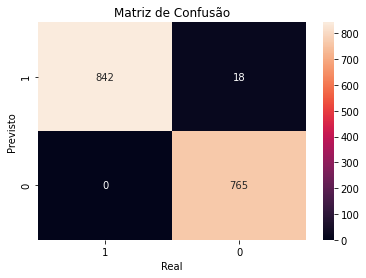

In [18]:
def predict_and_evaluate(model, X_test, y_test):

  y_pred = model.predict(X_test) #inferência do teste

  # Acurácia
  from sklearn.metrics import accuracy_score
  accuracy = accuracy_score(y_test, y_pred)
  print('Acurácia: ', accuracy)

  # Kappa
  from sklearn.metrics import cohen_kappa_score
  kappa = cohen_kappa_score(y_test, y_pred)
  print('Kappa: ', kappa)

  # F1
  from sklearn.metrics import f1_score
  f1 = f1_score(y_test, y_pred, average='macro')
  print('F1: ', f1)

  # Matriz de confusão
  from sklearn.metrics import confusion_matrix
  confMatrix = confusion_matrix(y_pred, y_test)

  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f")
  plt.xlabel('Real')
  plt.ylabel('Previsto')
  plt.title('Matriz de Confusão')

  # Colocar os nomes
  ax.xaxis.set_ticklabels(list(map(str,y_train.unique()))) 
  ax.yaxis.set_ticklabels(list(map(str,y_train.unique())))
  plt.show()

predict_and_evaluate(model, X_test, y_test)

## Fazer previsões em todo o banco de dados (incluindo teste e treino)

In [19]:
# carregar base a ser inferida
df_infer = pd.read_csv('mushrooms.csv')
df_infer.shape

(8124, 23)

In [20]:
df_infer.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [21]:
#converter o rótulo categórico em numérico usando o OneHotEncoder
df_infer_dummies = pd.get_dummies(df_infer, drop_first=True)  
# REtirar a coluna class_p
X_df_infer_dummies = df_infer_dummies.loc[:,df_infer_dummies.columns != 'class_p']  # inputs
y_df_infer_dummies = df_infer_dummies['class_p']                      # outputs


In [22]:
# Fazer previsões
predictions = model.predict(X_df_infer_dummies)

# visualizar previsões
predictions

array([1, 0, 0, ..., 0, 1, 0], dtype=uint8)

In [23]:
# Juntar ao dataset
X_df_infer_dummies['previsoes'] = predictions
X_df_infer_dummies.head()

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,cap-color_g,cap-color_n,cap-color_p,cap-color_r,cap-color_u,cap-color_w,cap-color_y,bruises_t,odor_c,odor_f,odor_l,odor_m,odor_n,odor_p,odor_s,odor_y,gill-attachment_f,gill-spacing_w,gill-size_n,gill-color_e,gill-color_g,gill-color_h,gill-color_k,gill-color_n,gill-color_o,gill-color_p,gill-color_r,gill-color_u,gill-color_w,gill-color_y,...,stalk-color-above-ring_p,stalk-color-above-ring_w,stalk-color-above-ring_y,stalk-color-below-ring_c,stalk-color-below-ring_e,stalk-color-below-ring_g,stalk-color-below-ring_n,stalk-color-below-ring_o,stalk-color-below-ring_p,stalk-color-below-ring_w,stalk-color-below-ring_y,veil-color_o,veil-color_w,veil-color_y,ring-number_o,ring-number_t,ring-type_f,ring-type_l,ring-type_n,ring-type_p,spore-print-color_h,spore-print-color_k,spore-print-color_n,spore-print-color_o,spore-print-color_r,spore-print-color_u,spore-print-color_w,spore-print-color_y,population_c,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w,previsoes
0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
3,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1
4,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


Text(0.5, 1.0, 'Matriz de Confusão')

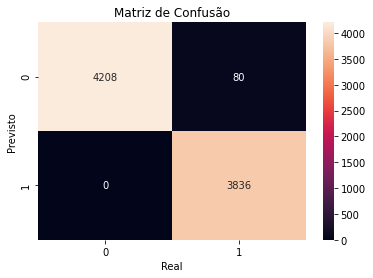

In [24]:
# Matriz de confusão
from sklearn.metrics import confusion_matrix
confMatrix = confusion_matrix(predictions, y_df_infer_dummies)

ax = plt.subplot()
sns.heatmap(confMatrix, annot=True, fmt=".0f")
plt.xlabel('Real')
plt.ylabel('Previsto')
plt.title('Matriz de Confusão')


In [28]:
# Acurácia
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_df_infer_dummies, predictions)
print('Acurácia: ', accuracy)


Acurácia:  0.9901526341703595


### CONCLUSÃO: o modelo de random forest com 4 ramificações (max_depth) consegue um acurácia de 99% quando aplicado sobre toda a amostra.